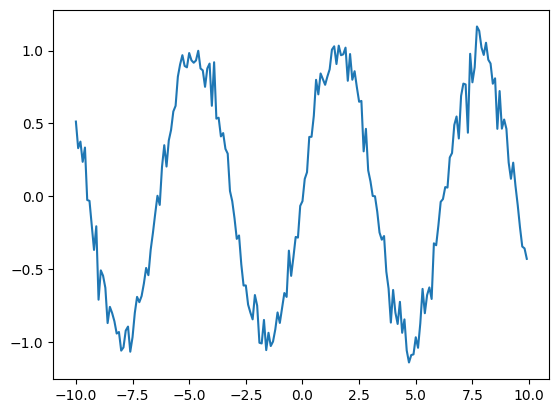

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from RNNTrainer import *

x=np.arange(-10,10,0.1)
x = x.reshape(len(x),1)
y = np.sin(x)+0.1*np.random.randn(len(x),1)

plt.plot(x,y)
plt.show()

-------------------------
 Epoch 0, Loss: 0.25
####################################################################################################
Min loss achieved: 0.014
####################################################################################################


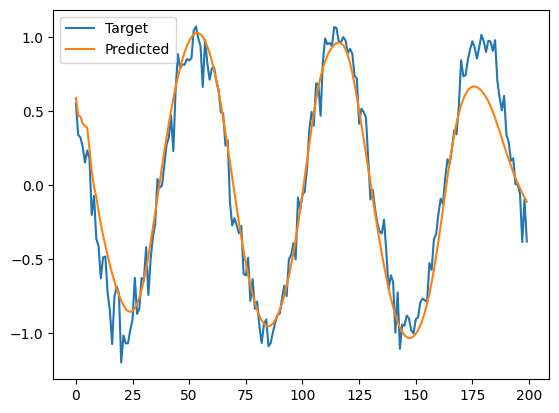

In [2]:
model1 = RNNTrainer(x, y,optimizer_type="SGD")
model1.train(epochs=500)
model1.plot_results()

-------------------------
 Epoch 0, Loss: 0.259
####################################################################################################
Min loss achieved: 0.004
####################################################################################################


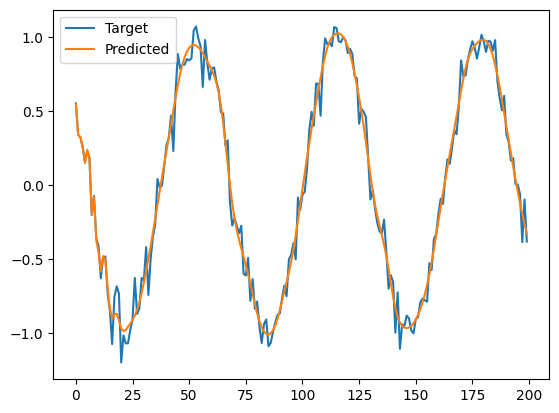

In [3]:
model2 = RNNTrainer(x, y,optimizer_type="Adam")
model2.train(epochs=1000)
model2.plot_results()

In [4]:
# num_overlap = 25  
# num_test_points = 50 
# x_overlap = x[-num_overlap:]
# x_test = np.concatenate([x_overlap, np.arange(x[-1, 0] + 0.1, x[-1, 0] + 0.1 + num_test_points - num_overlap, 0.1).reshape(-1, 1)])
# print(x_test.shape)
x_test = np.arange(0,20,0.3)
x_test = x_test.reshape(len(x_test),1)

In [5]:
y_test_pred = model2.test(x_test)

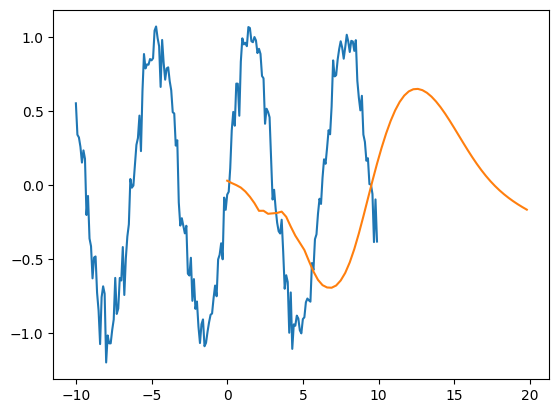

In [6]:

plt.plot(x,y)
plt.plot(x_test,y_test_pred)
plt.show()

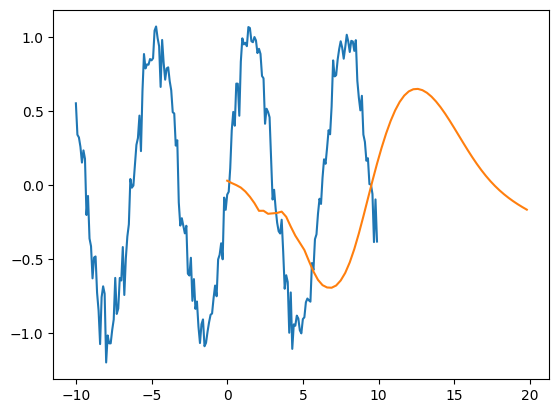

In [7]:
T=max(x_test.shape)
y_test_pred = np.zeros_like(x_test)
H = [np.zeros((model1.rnn.no_of_neurons,1))for i in range(T+1)]

for t,xt in enumerate(x_test):
    xt = xt.reshape(-1, 1)
    output = np.dot(model2.best_Wh,H[t])+np.dot(model2.best_Wx,xt)+model2.best_bias
    H[t+1] = np.tanh(output)
    y_test_pred[t] = np.dot(model2.best_Wy,H[t+1])

plt.plot(x,y)
plt.plot(x_test,y_test_pred)
plt.show()

In [8]:
y_test_pred.shape

(67, 1)

-------------------------
 Epoch 0, Loss: 0.351
-------------------------
 Epoch 1000, Loss: 0.006
-------------------------
 Epoch 2000, Loss: 0.004
-------------------------
 Epoch 3000, Loss: 0.002
-------------------------
 Epoch 4000, Loss: 0.001
####################################################################################################
Min loss achieved: 0.001
####################################################################################################


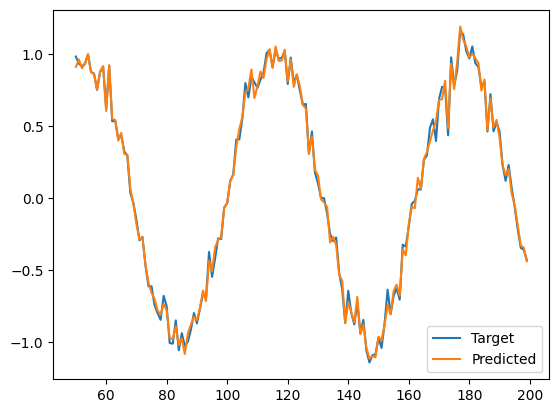

In [13]:
model3 = RNNTrainer(x, y,units=100,optimizer_type="Adam",dt=50)
model3.train(epochs=5000)
model3.plot_results()